## Detect Rambu
This is the 2nd file of myproject Indonesia Traffic Sign Detection. Please see my 1st file which is "detect rambu - EDA.ipynb". Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. The goal of my current project is to detect person from a collection of images and videos and then create a bounding box to state where the object is located. I am using Yolov8 as model architecture with ultralytics library. Dataset obtained from paper "Implementasi Deep Learning untuk Object Detection Menggunakan Algoritma YOLO (You Only Look Once) pada Rambu Lalu Lintas di Indonesia" by Adhy Wiranto Sudjana. Please see my 1st file to collect dataset and EDA.

### 1. Install and import ultralytics library first

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.2/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 0.2.8>=0.2.5


In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno, ultralytics


### 2. Get the dataset
Link dataset : https://drive.google.com/file/d/1J4KKEuoQS4_du65uQ1lK4l4o5_yUFeAF/view?usp=sharing

Put and unzip the dataset to your directory. Directory structure should be like this :
- Detect Rambu
  - images
  - labels
  - dataset.yaml
  

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Assume you put the dataset file in "/content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/Detect Rambu-20240612T125847Z-001.zip"
## unzip it and it will unzip in current directory

!unzip "/content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/Detect Rambu-20240612T125847Z-001.zip"
!pwd

Archive:  /content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/Detect Rambu-20240612T125847Z-001.zip
  inflating: Detect Rambu/labels/train.cache  
  inflating: Detect Rambu/dataset.yaml  
  inflating: Detect Rambu/labels/val.cache  
  inflating: Detect Rambu/images/train/peringatan pintu perlintasan kereta api (14).jpg  
  inflating: Detect Rambu/images/train/larangan belok kanan (35).jpg  
  inflating: Detect Rambu/images/train/larangan belok kiri (1).jpg  
  inflating: Detect Rambu/images/train/petunjuk lokasi pemberhentian bus (5).jpg  
  inflating: Detect Rambu/images/train/larangan berhenti (67).jpg  
  inflating: Detect Rambu/images/train/larangan berjalan terus wajib berhenti sesaat (45).jpg  
  inflating: Detect Rambu/images/train/peringatan simpang tiga sisi kiri (11).jpg  
  inflating: Detect Rambu/images/train/larangan belok kiri (29).jpg  
  inflating: Detect Rambu/images/train/larangan belok kanan (55).jpg  
  inflating: Detect Rambu/images/train/peringatan banyak pejalan

In [ ]:
## change directory to your directory where images & labels are stored
%cd "/content/Detect Rambu"

/content/Detect Rambu


###2.1 Check Dataset
Number of files should be <br>
Jumlah Train / Val / Test Images : 1469 / 399 / 231 <br>
Jumlah Train / Val / Test Label : 1469 / 399 / 231

In [ ]:
import glob


f_train_img = glob.glob(f"images/train/*jpg")
f_val_img = glob.glob(f"images/val/*jpg")
f_test_img = glob.glob(f"images/test/*jpg")

f_train_label = glob.glob(f"labels/train/*txt")
f_val_label = glob.glob(f"labels/val/*txt")
f_test_label = glob.glob(f"labels/test/*txt")

print(f"Jumlah Train / Val / Test Images : {len(f_train_img)} / {len(f_val_img)} / {len(f_test_img)}")
print(f"Jumlah Train / Val / Test Label : {len(f_train_label)} / {len(f_val_label)} / {len(f_test_label)}")

Jumlah Train / Val / Test Images : 1469 / 399 / 231
Jumlah Train / Val / Test Label : 1469 / 399 / 231


### 3. Get the pre-trained Yolov8
URL : https://docs.ultralytics.com/tasks/detect/ <br>
There are several pretrained files for detection. First row is the fastest but the result is not to good. I'm using "yolov8m.pt"<img src="yolo pretrained.png">

In [ ]:
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt

### 4. Use downloaded yolo as pre-trained model

In [ ]:
#%cd MyProject/detect_rambu
model = YOLO("yolov8s.pt")
!pwd

/content/Detect Rambu


In [ ]:
!ls

### 5. Train the dataset with 100 epoch, imagesize 640 and batch 8

In [ ]:
## auto
##model.train(data='./dataset.yaml', epochs=100, imgsz=640, device=0, batch=8)

## custom optim & lr
model.train(data='./dataset.yaml', epochs=100, imgsz=640, device=0, batch=8, optimizer='Adam', lr0=0.0001)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=./dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.14G     0.7844     0.8522      1.068          6        640: 100%|██████████| 184/184 [00:51<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.835      0.799      0.859      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.96G     0.7341     0.7405      1.038         11        640: 100%|██████████| 184/184 [00:48<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.903      0.864      0.929      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.07G       0.72     0.7113      1.039          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.878       0.91      0.935       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.04G     0.7208      0.703      1.036          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.925      0.895      0.941      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.05G     0.7247     0.6879       1.03          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        399        429      0.937      0.916      0.951      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.06G     0.7132     0.6671       1.04          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.896      0.925      0.947       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.05G     0.7071     0.6508      1.043          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.911       0.92      0.957      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.06G     0.7037     0.6081      1.026         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.923      0.918      0.953        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.06G     0.6976     0.5973      1.025          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.888      0.913      0.932      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.04G     0.6992     0.5848      1.027          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.905       0.88      0.933      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.06G     0.6752     0.5667      1.007          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.953      0.888      0.947      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.05G     0.6771     0.5574      1.018         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.945      0.914      0.954      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.05G     0.6867     0.5857      1.017          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.936      0.935      0.957      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.05G     0.6588     0.5482      1.017         16        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.946      0.936      0.967       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.06G     0.6534     0.5342      1.011          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.945      0.931       0.96      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.06G     0.6519     0.5277      1.003         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429       0.92      0.919      0.947      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.06G     0.6389     0.5231     0.9957          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.935      0.913      0.958      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.06G     0.6287     0.4944     0.9867         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.945      0.926      0.952      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.03G     0.6463     0.5016      1.005          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]


                   all        399        429      0.931      0.902       0.95      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.06G     0.6246     0.4797     0.9906          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]

                   all        399        429      0.961       0.93      0.965      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.05G     0.6128     0.4661     0.9848         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.943       0.94      0.962      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.06G     0.6194     0.4886     0.9966         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.919      0.926      0.954      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.06G      0.602     0.4628     0.9834         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.946       0.93      0.958      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.06G     0.5989      0.455     0.9732         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.929      0.924      0.959      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.05G     0.5945     0.4531     0.9794         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.925      0.948      0.961       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.04G     0.5928     0.4485     0.9728          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.921       0.93      0.953      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.06G     0.5832     0.4433      0.966         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.934      0.924      0.952       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.06G     0.5872      0.454     0.9674          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.939      0.923      0.966       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.06G     0.5784     0.4347     0.9704          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.953      0.929      0.963      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.04G     0.5821     0.4324      0.963         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.932      0.931      0.968      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.06G     0.5692     0.4336     0.9637         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.911      0.943      0.956      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.02G     0.5729      0.435     0.9674         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.934      0.925      0.956      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.06G     0.5666     0.4379     0.9645         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.939      0.932      0.957      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.05G      0.564     0.4171     0.9603         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.948      0.926      0.961      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.04G     0.5702     0.4137      0.964         17        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.941      0.917      0.952      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.03G     0.5415     0.3992     0.9537         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.917      0.949       0.96      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.06G     0.5371     0.3905     0.9442         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.935      0.941      0.965      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.05G     0.5476     0.3932     0.9571          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429       0.95      0.946      0.975      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.04G     0.5272     0.3821      0.946         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.957      0.943      0.971      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.05G     0.5242     0.3746      0.944         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.947      0.929      0.963      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.04G     0.5337      0.395     0.9467         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.923      0.933      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.04G      0.521     0.3697     0.9381         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.941      0.939       0.96      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.03G     0.5197     0.3696     0.9438          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.953      0.918      0.963      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.05G     0.5238     0.3798     0.9507         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.946      0.951       0.97      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.05G     0.5372     0.3823     0.9454         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.946      0.943      0.966      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.04G     0.5125     0.3785     0.9362         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.933      0.938      0.956      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.05G     0.4982     0.3555     0.9324         17        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.942      0.946      0.971      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.06G     0.5078     0.3635     0.9428         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.949      0.922      0.964      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.06G     0.4892     0.3431     0.9252          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.955      0.948      0.968      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.05G     0.4961     0.3557     0.9358          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.934      0.938      0.963      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.04G     0.4926     0.3582     0.9326         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.938      0.948      0.965      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.06G     0.4925     0.3485     0.9288          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.914      0.921      0.955      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.04G     0.4733     0.3449     0.9223         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.939      0.943      0.966       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.06G     0.4836     0.3423     0.9279         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]

                   all        399        429      0.962      0.944       0.97      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.04G     0.4821     0.3411     0.9276         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]

                   all        399        429      0.925      0.945      0.959       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.04G     0.4636     0.3293     0.9157         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429       0.95      0.939      0.962      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.06G      0.467     0.3273     0.9232         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.954      0.946      0.961      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.03G     0.4672     0.3308     0.9288         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.962      0.941      0.968      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.05G     0.4696     0.3351     0.9212          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.948      0.941      0.966      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.05G     0.4661     0.3328     0.9219          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.951       0.95      0.964       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.02G     0.4594     0.3227     0.9073         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.946      0.955      0.966      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.06G     0.4621     0.3217     0.9165         16        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.976      0.933      0.969      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.06G     0.4431     0.3132     0.9127         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.947      0.942      0.965      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.06G     0.4647     0.3232     0.9208          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.946      0.945      0.965      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.05G     0.4484     0.3178     0.9103         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.953      0.949      0.969      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.04G     0.4449     0.3061     0.9133          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.952      0.931      0.963      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.06G     0.4328     0.3083     0.9077          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.946      0.945      0.959      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.03G     0.4253      0.305     0.9049         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.952      0.942      0.961      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.05G     0.4312     0.3044     0.9038         16        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.949       0.94      0.956      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.03G      0.427     0.3081      0.907         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.952      0.944       0.96      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.04G     0.4329     0.3047     0.9122         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.966      0.927      0.967       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.06G     0.4124     0.2857     0.9009         17        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.949      0.943      0.961      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.05G     0.4251     0.2938     0.9051         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.962      0.941      0.967      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.04G     0.4066     0.2838     0.8963         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.952      0.951      0.964      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.06G     0.4094     0.2948     0.9031          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]

                   all        399        429      0.942      0.943      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.06G     0.4087     0.2818     0.9054         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.937      0.939      0.962      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.05G     0.4043     0.2733     0.9029         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.959      0.934      0.967      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.05G     0.4146     0.2932     0.8982         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.951      0.959      0.966      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.05G     0.4062     0.2805     0.8992         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.949      0.946      0.964      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.04G     0.4069     0.2802      0.899         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.953      0.936      0.965      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.05G     0.3976     0.2776     0.8965          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.949      0.946      0.966      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.04G     0.3966     0.2748     0.9014         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]


                   all        399        429      0.944      0.947      0.968      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.05G     0.3874     0.2765     0.8972          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.946      0.955      0.966      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.05G     0.3938     0.2741     0.8986         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.956      0.955      0.969      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.06G     0.3784     0.2622     0.8899          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.962      0.927      0.967      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.06G     0.3899     0.2666      0.897          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429       0.97      0.944       0.97      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.03G     0.3902     0.2731     0.9044          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.957      0.937       0.97      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.05G     0.3891     0.2632     0.8969         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.957      0.944      0.968      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.06G      0.386     0.2639      0.896         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.957      0.944      0.966      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.05G     0.3896     0.2642     0.8947         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]

                   all        399        429      0.947      0.951      0.966      0.831


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.04G     0.3099     0.1707     0.8208          5        640: 100%|██████████| 184/184 [00:48<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.954      0.938      0.963      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.06G     0.3028     0.1648     0.8126          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.943      0.948      0.963      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.05G     0.2917     0.1602      0.809          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.948      0.947      0.964      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.05G       0.29     0.1604     0.8113          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.938      0.949      0.967      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.03G     0.2889     0.1589     0.8083          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.943      0.949      0.965      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.06G     0.2823     0.1572     0.8135          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.947      0.943      0.966      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.06G     0.2881     0.1559     0.8136          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.962      0.935      0.967      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.06G     0.2819     0.1553     0.8075          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.952       0.95      0.969      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.06G     0.2753     0.1504     0.8055          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]

                   all        399        429      0.953      0.951      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.05G     0.2749     0.1474     0.8053          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.953      0.949      0.969      0.836

100 epochs completed in 1.509 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.92it/s]


                   all        399        429      0.951      0.946      0.975      0.836
     larangan berhenti         19         19      0.979          1      0.995      0.947
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19          1      0.964      0.995      0.941
       larangan parkir         19         20          1       0.73      0.983      0.875
           lampu hijau         19         35       0.94      0.888      0.984      0.767
          lampu kuning         19         19      0.893       0.88      0.934      0.701
           lampu merah         19         19      0.831      0.776      0.869      0.663
  larangan belok kanan         19         20      0.702       0.95      0.933      0.874
   larangan belok kiri         19         23      0.956          1      0.995      0.903
larangan berjalan terus wajib berhenti sesaat         19         23      0.904      0.957       0.96      0.748
larangan memutar balik         19         19      0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d82d41b0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!cp -pr "runs" "/content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/"

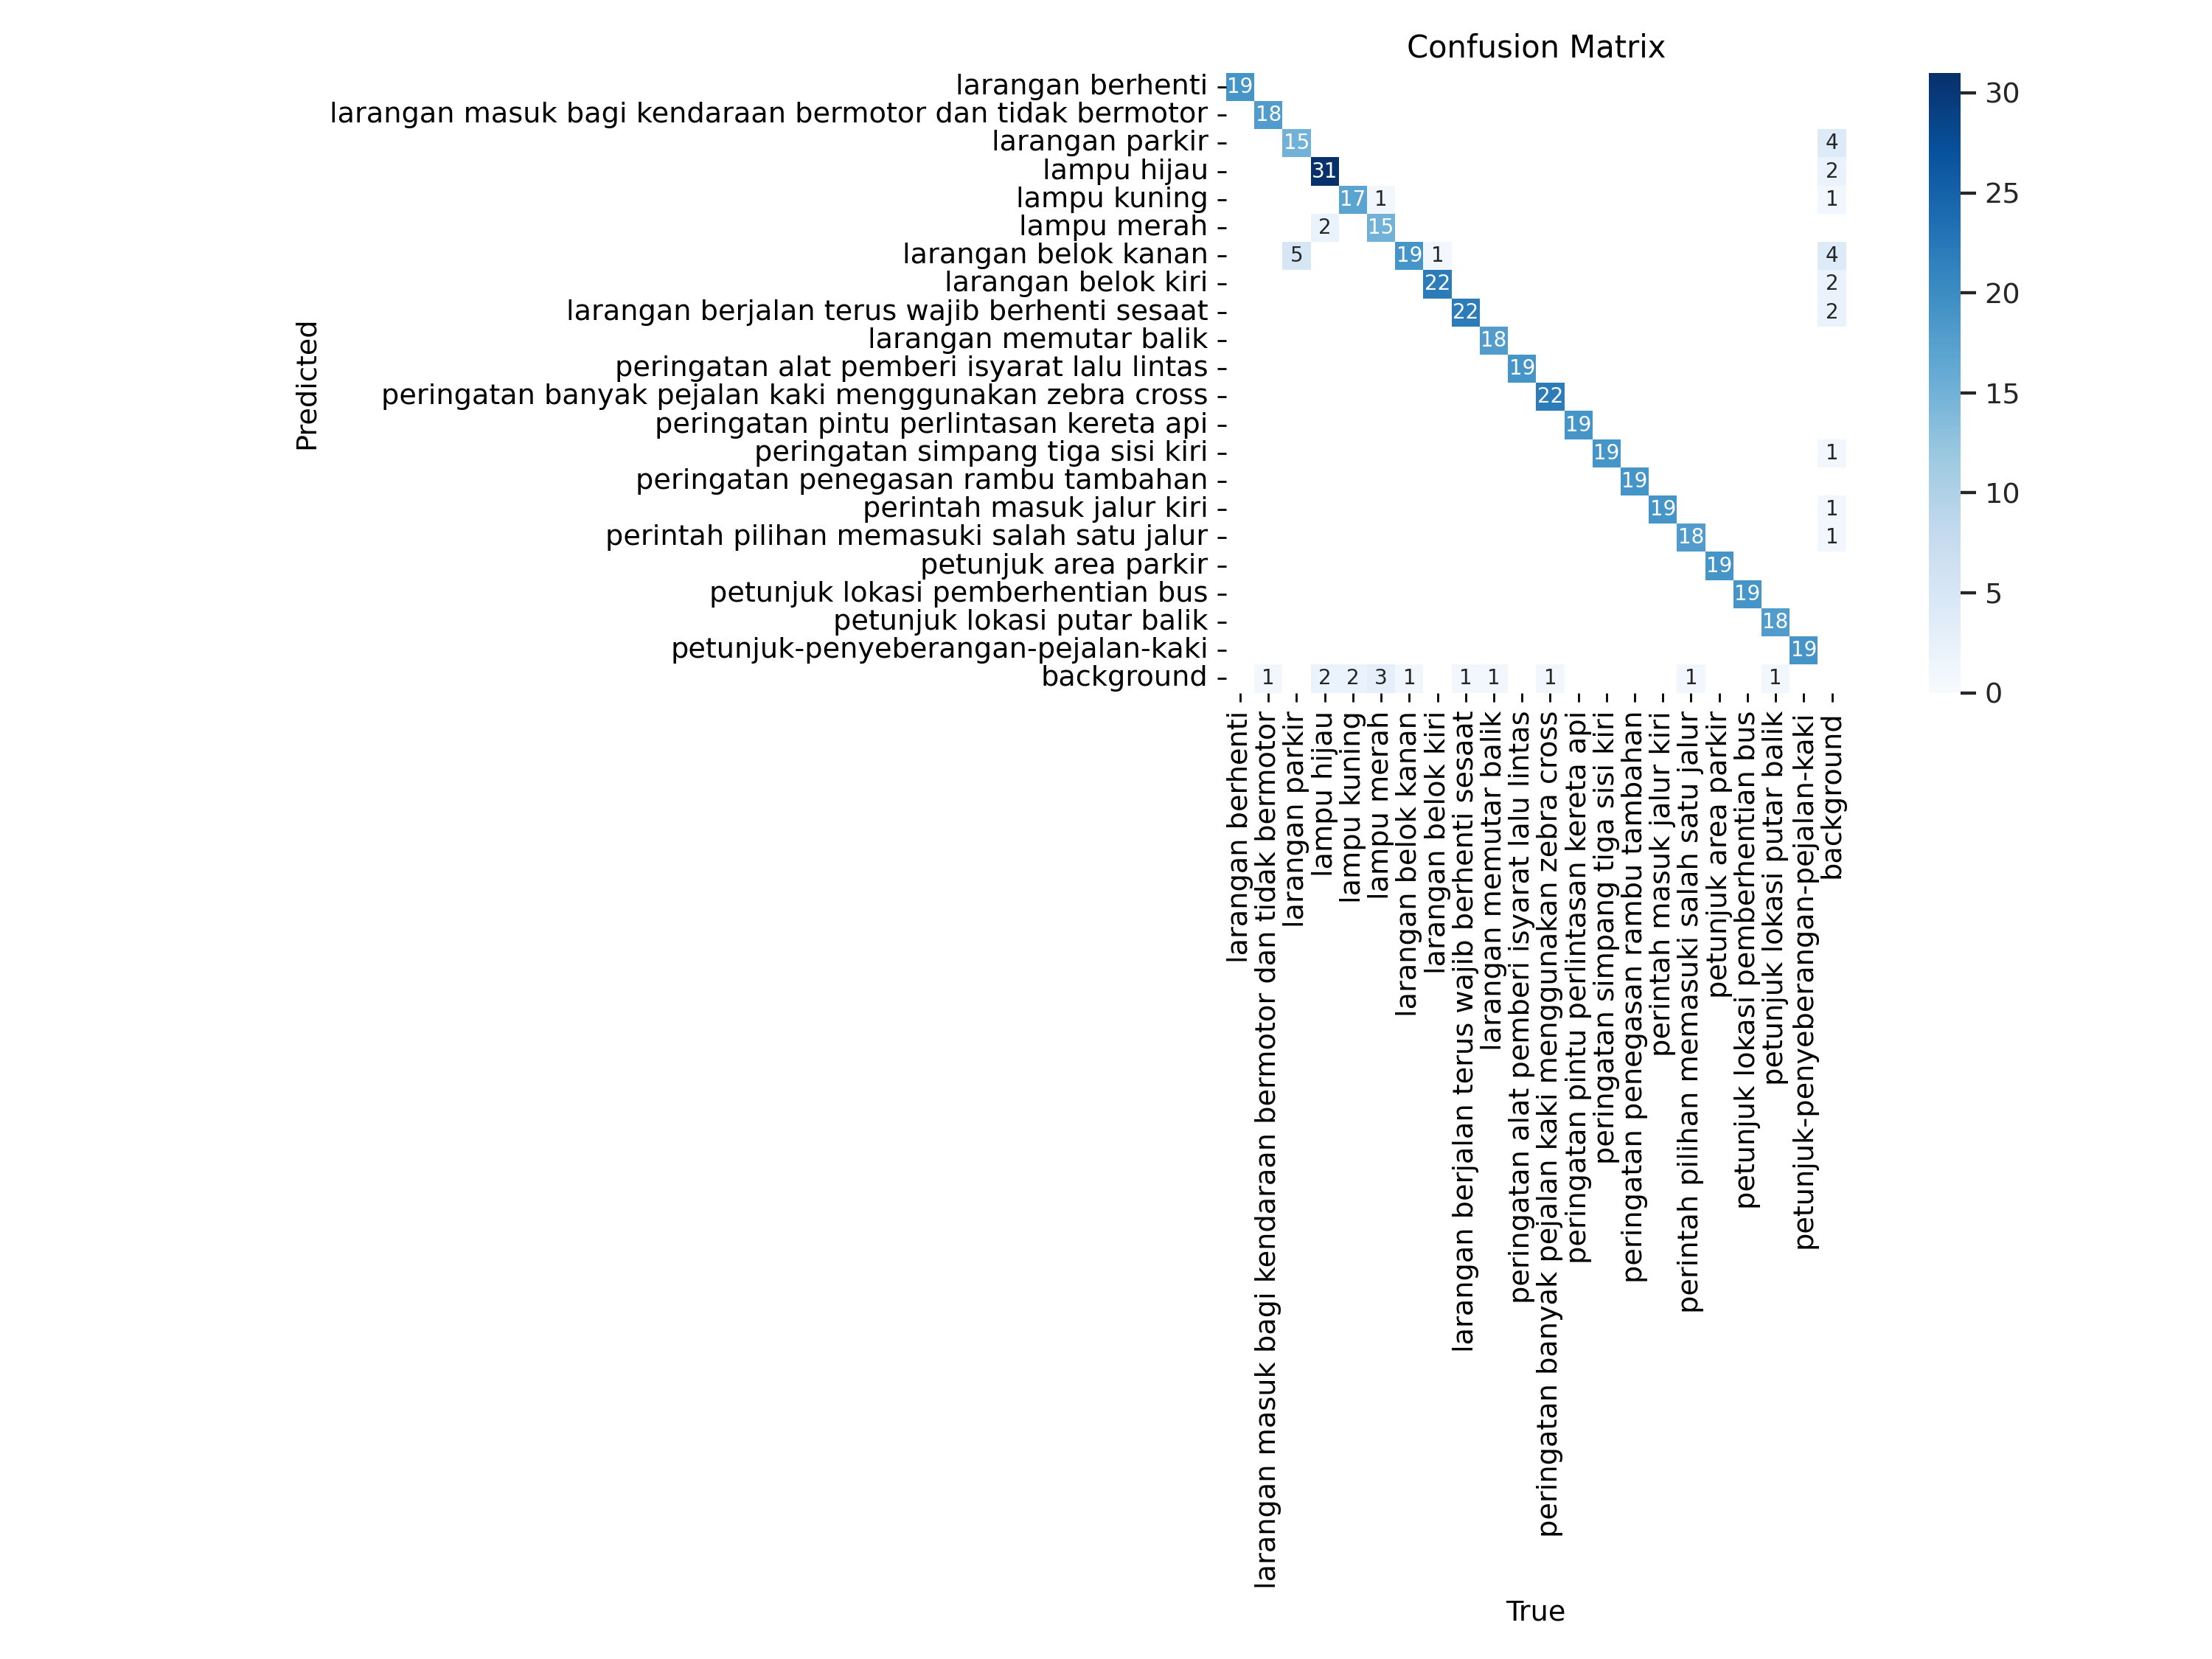

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=800)

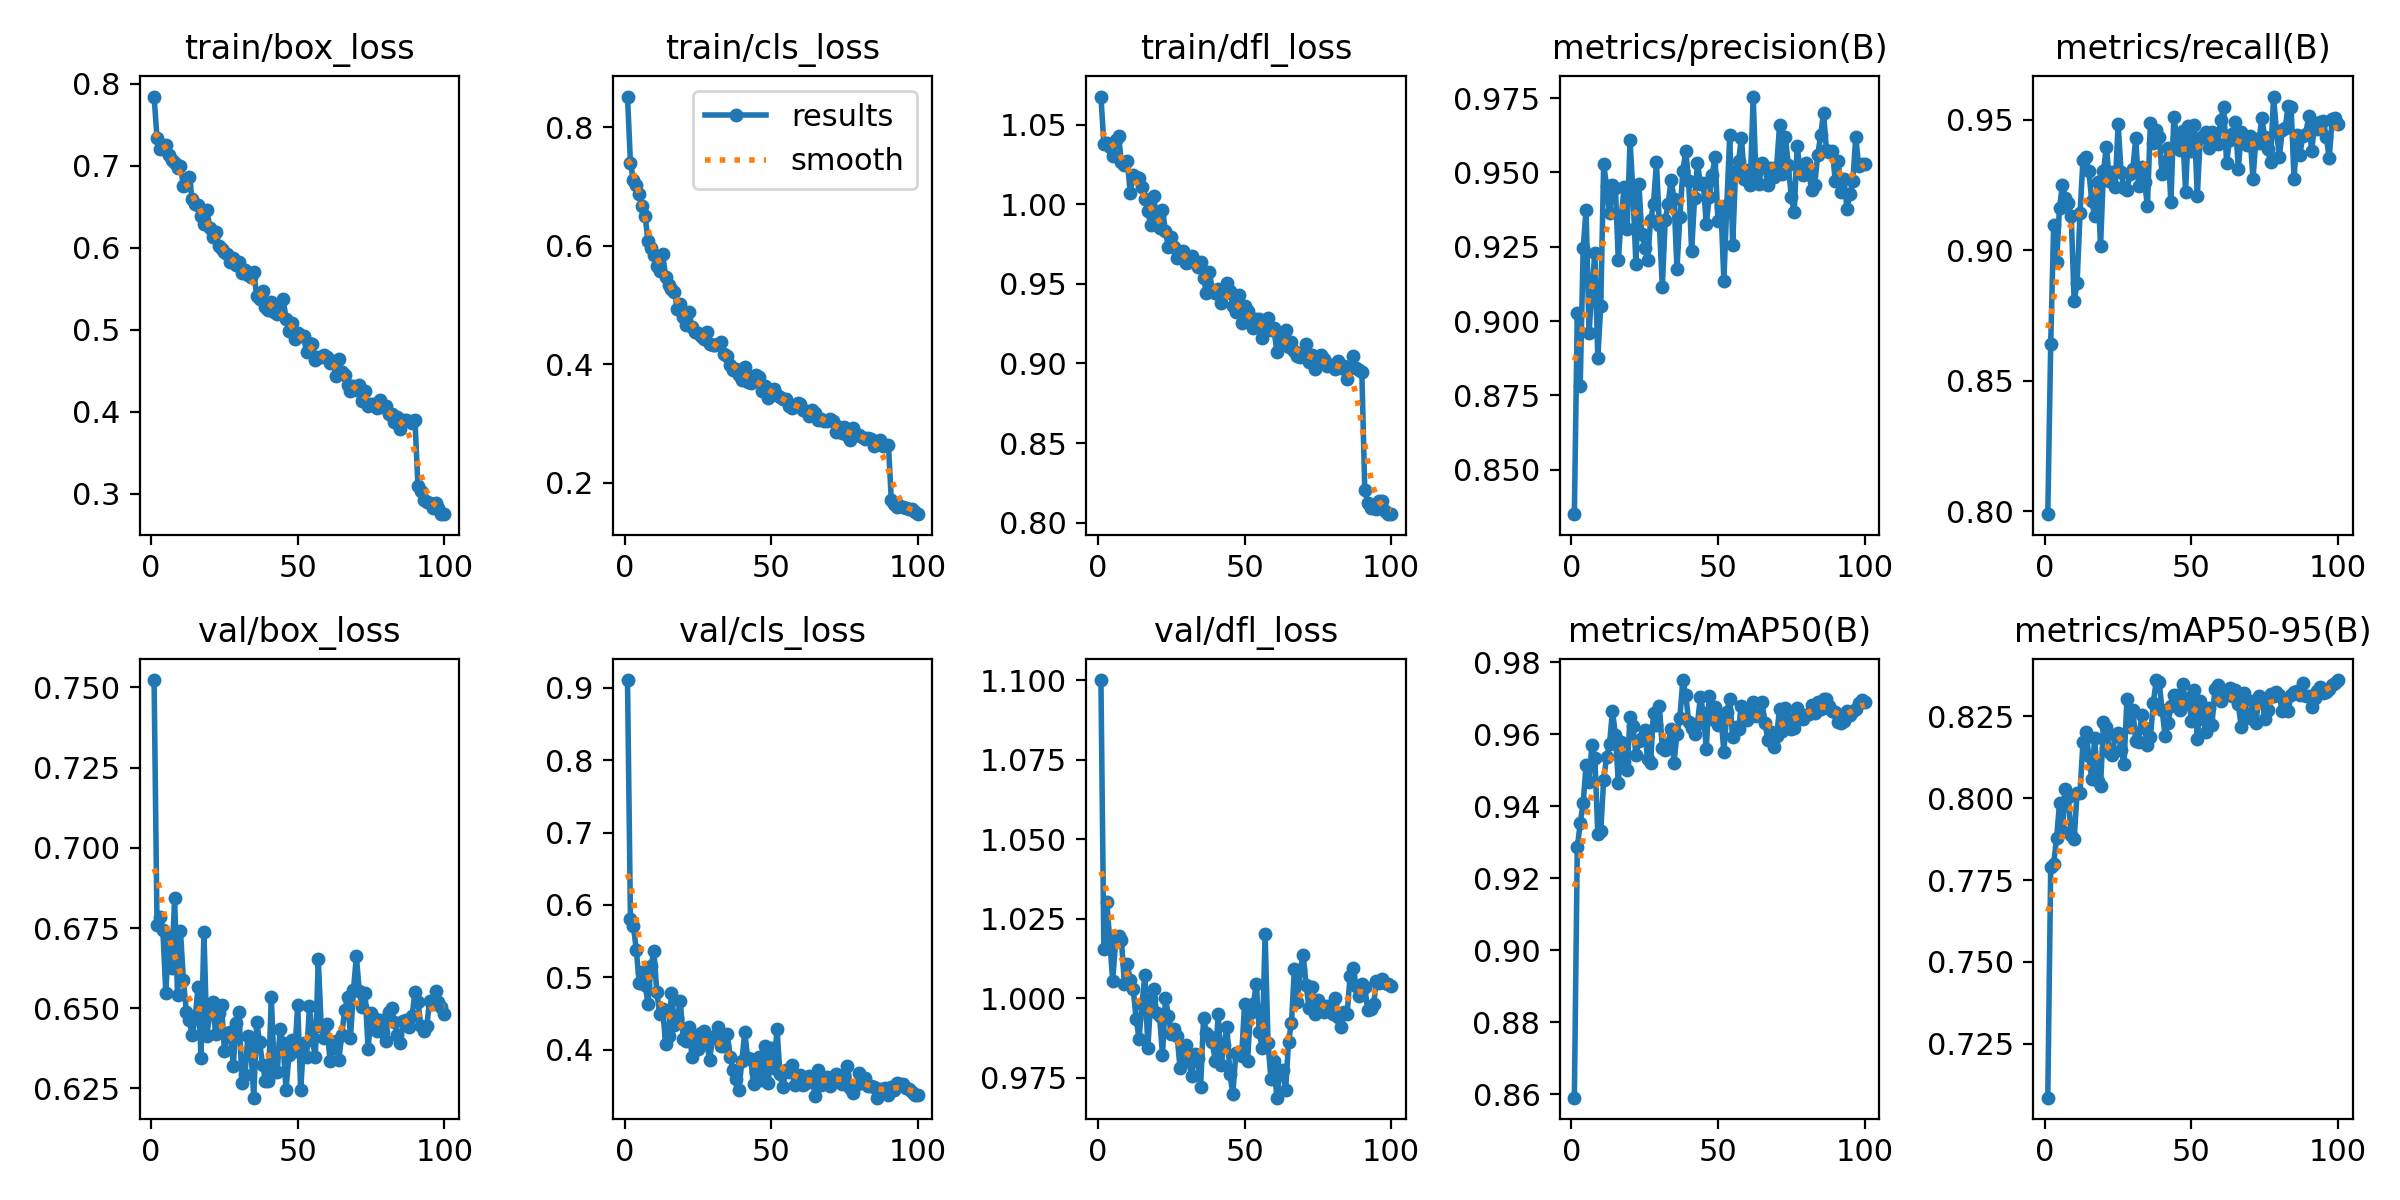

In [ ]:
Image(filename='runs/detect/train2/results.png')

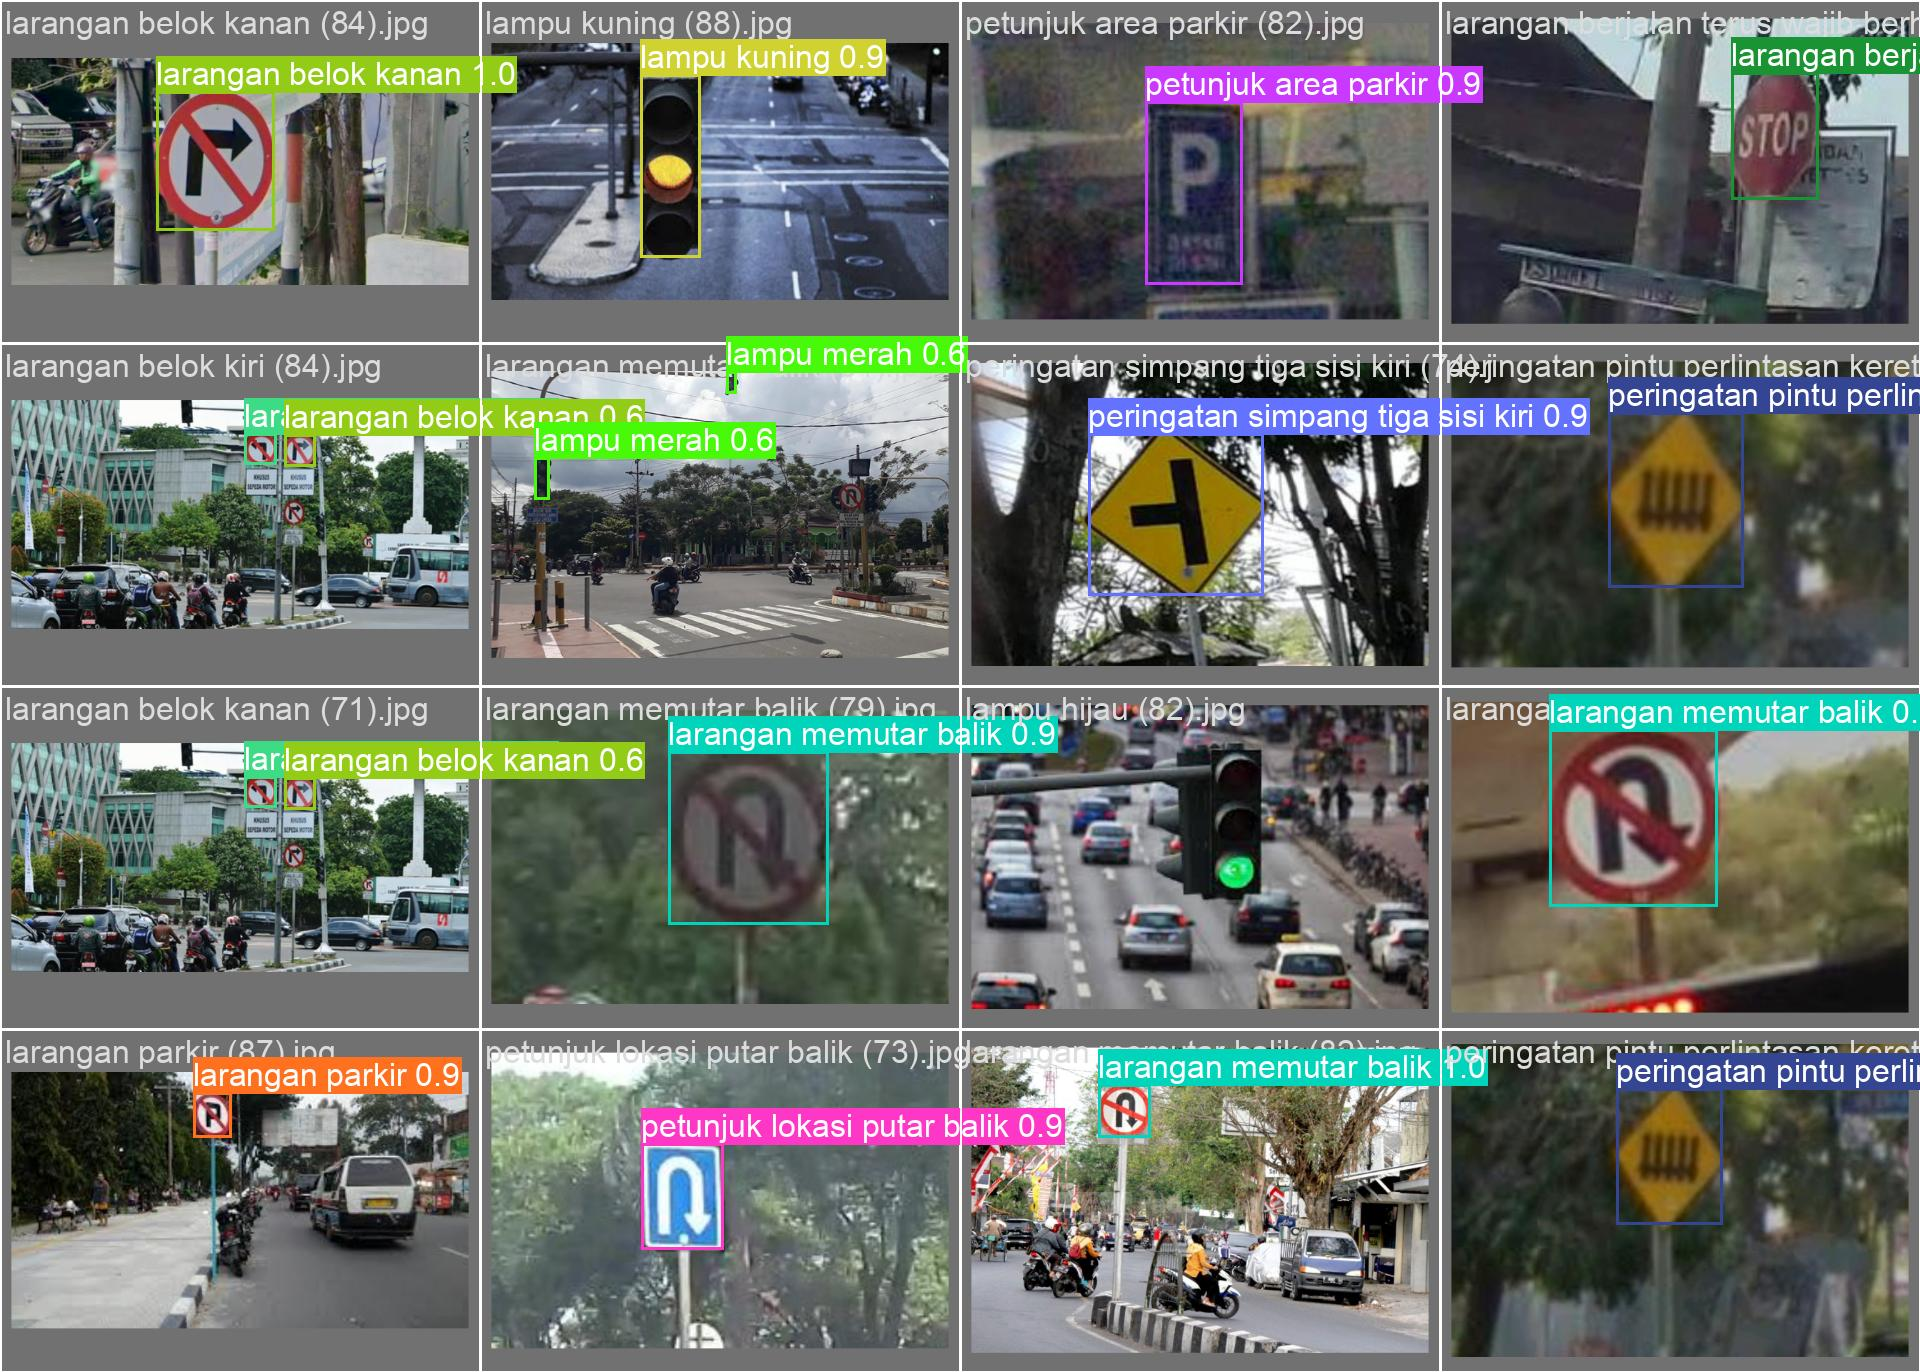

In [ ]:
Image(filename=f'runs/detect/train2/val_batch0_pred.jpg', width=1024)

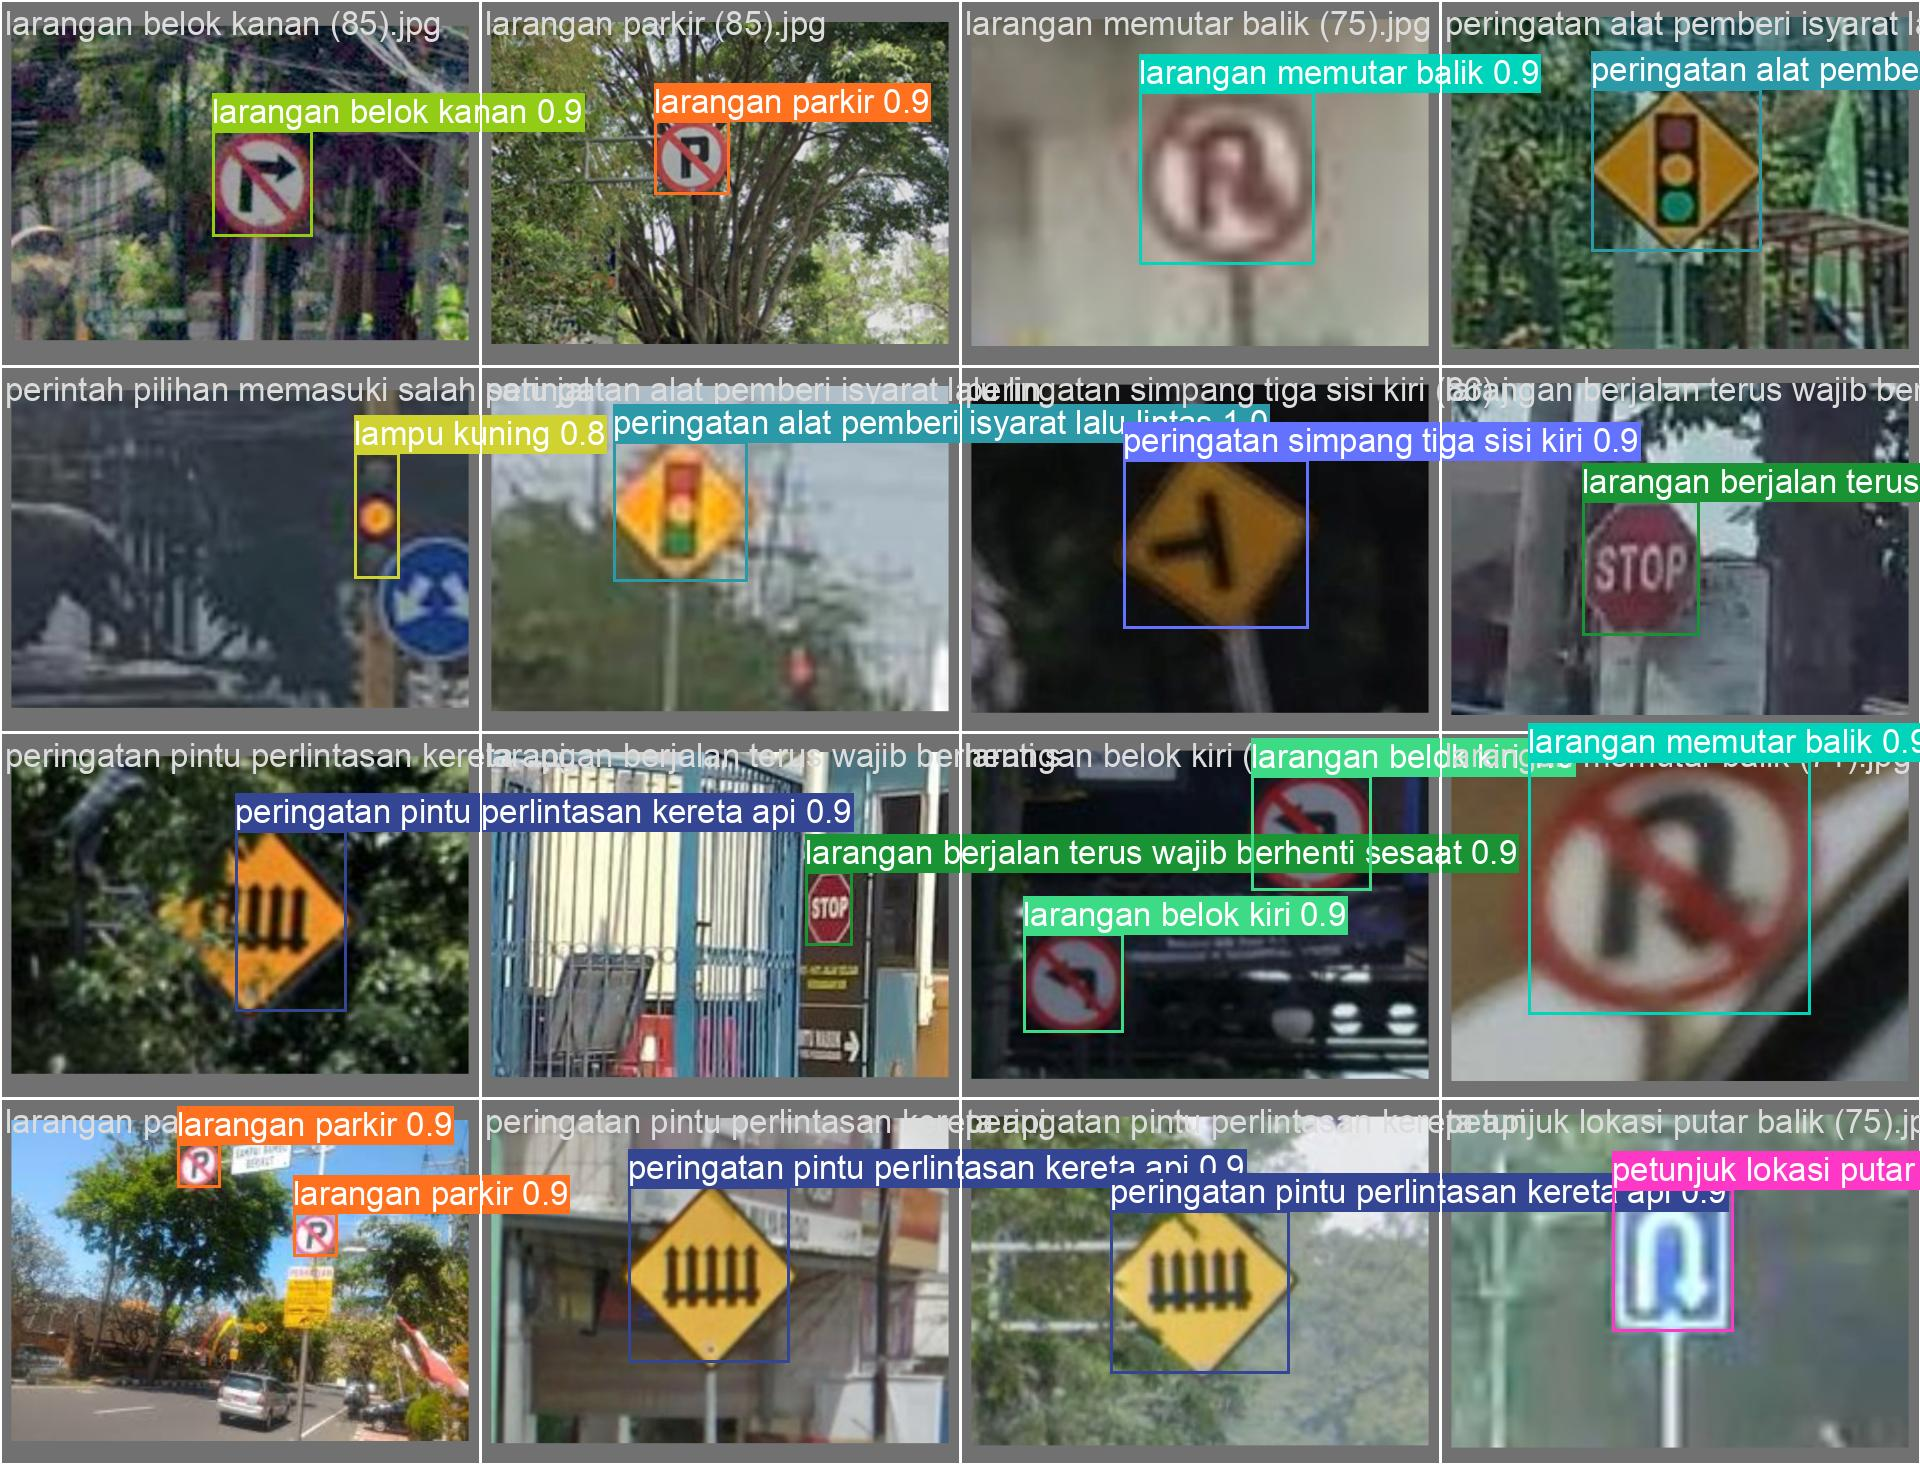

In [ ]:
Image(filename=f'runs/detect/train2/val_batch1_pred.jpg', width=1024)

### 6. Predict the test dataset

In [ ]:
## Load the best weight
model = YOLO("runs/detect/train2/weights/best.pt")

In [ ]:
# predict
predict_result = model.predict(source='images/test', conf=0.25, save=True)


image 1/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (100).jpg: 512x640 1 lampu hijau, 91.9ms
image 2/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (90).jpg: 288x640 2 lampu hijaus, 98.8ms


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 3/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (91).jpg: 640x448 1 lampu hijau, 125.4ms
image 4/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (92).jpg: 640x448 1 lampu hijau, 27.3ms
image 5/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (93).jpg: 640x416 1 lampu hijau, 91.7ms
image 6/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (94).jpg: 448x640 1 lampu hijau, 81.3ms
image 7/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (95).jpg: 640x448 1 lampu hijau, 28.6ms
image 8/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (96).jpg: 256x640 1 lampu hijau, 96.3ms
image 9/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (97).jpg: 640x480 1 lampu hijau, 71.6ms
image 10/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (98).jpg: 640x

### 7. Sampling the predict result

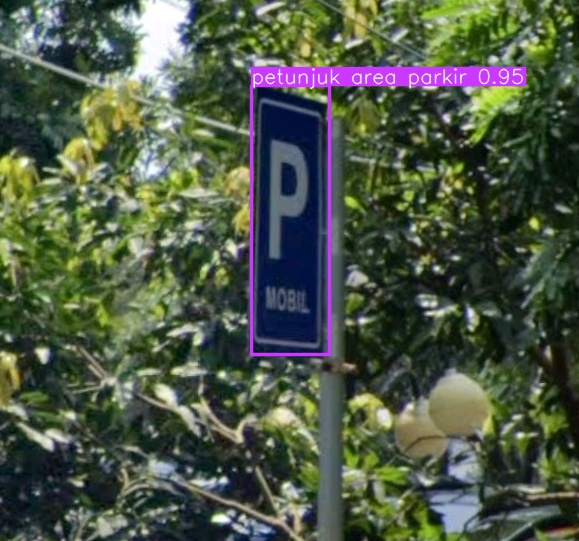

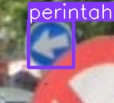

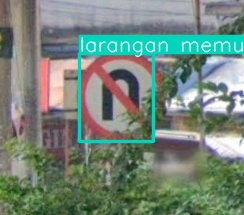

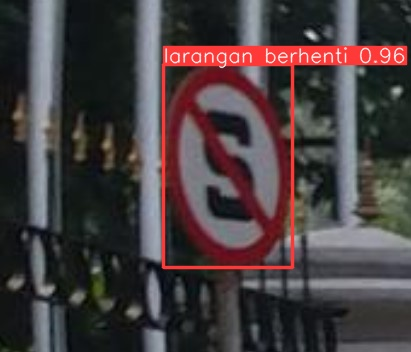

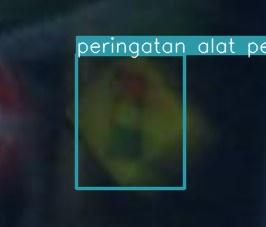

In [ ]:
import glob, random
from IPython.display import Image, display

for image_path in random.choices(glob.glob(f'runs/detect/predict/*.jpg'), k=5):
      display(Image(filename=image_path, width=300))
      print("\n")

In [ ]:
model = YOLO("runs/detect/train2/weights/last.pt")

In [ ]:
model.train(data='./dataset.yaml', epochs=75,imgsz=640, device=0, batch=8 )

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=./dataset.yaml, epochs=75, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      4.29G      0.607     0.5061     0.9774          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all        399        429      0.949      0.923      0.963      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      4.17G     0.6645     0.5696          1         11        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.15it/s]


                   all        399        429      0.924      0.931      0.966      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      4.27G     0.6978     0.6393      1.027          9        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.912      0.873      0.939      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      4.25G     0.7134     0.6812      1.035          8        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.899      0.856      0.933      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.27G     0.7218     0.6687       1.04          6        640: 100%|██████████| 184/184 [00:46<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.936      0.898      0.954      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.27G      0.694     0.6245      1.027          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.927      0.895      0.947      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.27G     0.7166     0.6319      1.041          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.923      0.909      0.944      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.25G     0.7037     0.6194       1.03         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.951      0.924       0.95      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.27G     0.6834     0.6017      1.017          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.948      0.906      0.959      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      4.26G     0.6895      0.599      1.029          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.943      0.895       0.94      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.26G     0.6688     0.5863      1.001          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.932      0.901      0.946      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      4.26G     0.6783     0.5723      1.019         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.944      0.897      0.944      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.24G     0.6821     0.5814      1.009          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.955      0.926      0.956      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      4.26G     0.6637     0.5539      1.017         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.948      0.936      0.958      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.26G     0.6624      0.541       1.02          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]

                   all        399        429      0.943      0.915      0.958      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      4.24G     0.6747     0.5516      1.014         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]

                   all        399        429      0.946      0.929      0.954      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      4.24G     0.6679     0.5524      1.014          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.947      0.937      0.954      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      4.27G     0.6504     0.5189      1.005         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.951      0.939      0.971      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      4.23G     0.6658     0.5191      1.019          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429       0.93      0.909      0.956      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      4.26G     0.6435     0.5319     0.9978          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.934       0.93       0.96      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      4.26G     0.6391     0.5177     0.9949         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.951      0.941      0.972      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      4.25G      0.644       0.51      1.021         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.943      0.941      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      4.26G     0.6242     0.4871     0.9948         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429       0.96      0.941      0.965      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      4.23G     0.6268     0.4883     0.9939         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.952      0.933      0.959      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      4.25G      0.614     0.4695     0.9963         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.946      0.946      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      4.24G     0.6215      0.454     0.9966          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.932      0.941      0.958      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      4.26G     0.5987     0.4715      0.987         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.924      0.932      0.954      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      4.25G      0.609     0.4637     0.9951          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.945      0.944      0.962      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      4.25G     0.6056     0.4659     0.9989          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.955      0.934      0.967      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      4.26G     0.5986     0.4498      0.984         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.941      0.937      0.964       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      4.27G     0.5966     0.4522     0.9766         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.951      0.933      0.966      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      4.25G     0.5959     0.4348     0.9806         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]

                   all        399        429      0.961      0.928       0.97       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      4.26G     0.5995     0.4557     0.9957         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429       0.95      0.931       0.96      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      4.26G     0.5739     0.4296     0.9784         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.946      0.944      0.966      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      4.27G      0.576      0.437     0.9958         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        399        429      0.948      0.924      0.958      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      4.26G     0.5606     0.4131     0.9782         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]

                   all        399        429      0.969      0.933      0.975      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      4.26G     0.5578     0.3909     0.9721         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.964      0.939      0.961      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      4.26G     0.5735     0.4037     0.9849          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.965      0.927      0.962      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      4.27G      0.547      0.402     0.9726         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.941      0.937      0.962      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      4.26G     0.5441     0.3943     0.9745         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.949      0.915      0.958      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      4.26G      0.544     0.4033     0.9759         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.943       0.93      0.954      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      4.26G     0.5348     0.3781     0.9684         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.962       0.93      0.961      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      4.23G     0.5259     0.3804     0.9676          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.959      0.955       0.97      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      4.25G     0.5354     0.3827     0.9662         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.973      0.922      0.964      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      4.26G     0.5482     0.3882     0.9695         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.971      0.938      0.968       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      4.26G     0.5278     0.3779     0.9563         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.964      0.926      0.966      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      4.26G     0.5174     0.3625     0.9463         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.933      0.948      0.963      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      4.26G     0.5185     0.3691     0.9597         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.944      0.924      0.945      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      4.26G     0.5052     0.3459     0.9351          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.958      0.934      0.965      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      4.24G     0.5034     0.3603     0.9457          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.965      0.941       0.97      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      4.26G     0.5005     0.3502     0.9436         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429       0.95      0.942      0.965      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      4.26G     0.4985     0.3449     0.9423          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.967      0.936      0.968      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      4.26G       0.48      0.329     0.9358         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.968      0.938      0.971      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      4.25G     0.4813     0.3316     0.9396         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.963      0.922      0.959      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      4.26G     0.4875     0.3461     0.9509         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.964      0.935      0.965      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      4.24G     0.4668     0.3243      0.945         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.963      0.938      0.965      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      4.26G     0.4609     0.3135     0.9421         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.968      0.943      0.965      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      4.26G      0.469     0.3243     0.9386         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.962      0.948      0.967       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      4.25G     0.4605     0.3207     0.9321          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.958      0.947      0.963      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      4.26G     0.4617       0.32     0.9298          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.954      0.937      0.964      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      4.23G     0.4502     0.3141     0.9175         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.962      0.933      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      4.26G     0.4467     0.2971     0.9297         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.957      0.934       0.96      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      4.25G     0.4303     0.2955     0.9203         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.954      0.937      0.966      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      4.26G     0.4532     0.3034     0.9313          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.957      0.929      0.961      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      4.25G     0.4301     0.2969     0.9215         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.936      0.947      0.959      0.832
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      4.24G     0.3663     0.1973     0.8381          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.961      0.913      0.954      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      4.25G     0.3672     0.1894     0.8373          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]

                   all        399        429       0.95      0.935      0.958      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      4.25G     0.3554     0.1877     0.8379          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.971      0.919      0.962      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      4.26G     0.3491     0.1837      0.839          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.971      0.922      0.964      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      4.25G     0.3395     0.1827     0.8331          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.973      0.924      0.961      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      4.26G     0.3329     0.1801     0.8282          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.974      0.926      0.962      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      4.26G     0.3259     0.1811     0.8261          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.962      0.933      0.963       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      4.25G     0.3272      0.173     0.8281          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.954      0.947      0.966       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      4.26G     0.3207     0.1702      0.828          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.953      0.949      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      4.25G     0.3174     0.1732     0.8313          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.954      0.946      0.964      0.831

75 epochs completed in 1.103 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.1MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


                   all        399        429      0.968      0.938      0.971      0.838
     larangan berhenti         19         19      0.972          1      0.995      0.937
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.994          1      0.995      0.937
       larangan parkir         19         20      0.947        0.9      0.983      0.902
           lampu hijau         19         35      0.982      0.857      0.985       0.81
          lampu kuning         19         19      0.816        0.7      0.881      0.646
           lampu merah         19         19      0.985      0.684      0.846       0.67
  larangan belok kanan         19         20      0.989        0.9      0.956       0.92
   larangan belok kiri         19         23       0.88          1      0.995      0.898
larangan berjalan terus wajib berhenti sesaat         19         23      0.987      0.957      0.971       0.77
larangan memutar balik         19         19       0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb944639b70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0